In [31]:
import numpy as np
import scipy.stats
import sklearn as skl
import sklearn.datasets as skl_data
from sklearn.experimental import enable_iterative_imputer


import matplotlib.pyplot as plt

## Gaussian

In [3]:
A = np.random.randn(2, 2)
C = A @ A.T

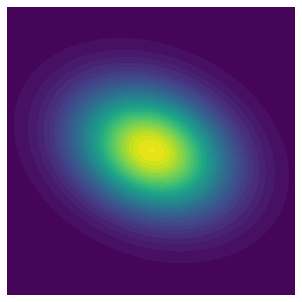

In [18]:
fig = plt.figure(frameon=False, figsize=(4,4))
ax = fig.add_axes([0, 0, 1, 1])

x0, x1 = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.empty(x0.shape + (2,))
pos[:, :, 0] = x0; pos[:, :, 1] = x1

density = scipy.stats.multivariate_normal(cov=C)
pdf = density.pdf(pos)

ax.contourf(x0, x1, pdf, levels=40)

ax.axis('off')

# fig.tight_layout()
plt.savefig('slide-figures/Gaussian.pdf')

## MICE on half-moons

In [29]:
X, Y = skl_data.make_moons(n_samples=300, noise=0.05)

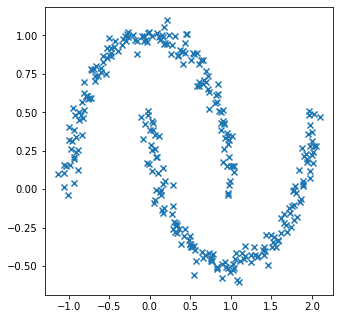

In [30]:
fig = plt.figure(frameon=False, figsize=(4,4))
ax = fig.add_axes([0,0, 1,1])

ax.scatter(X[:, 0], X[:, 1], marker='x')

In [39]:
frac = 0.2
M1 = np.zeros(X.shape[0], dtype=np.bool)
M1[:int(M.shape[0]*0.2)] = 1
np.random.shuffle(M1)

M2 = np.zeros(X.shape[0], dtype=np.bool)
M2[:int(M.shape[0]*0.2)] = 1
np.random.shuffle(M2)

M = M1 | M2

X_incomp = X.copy()
X_incomp[M1, 0] = np.nan
X_incomp[M2, 1] = np.nan

In [47]:
X_incomp[:10]

array([[        nan,         nan],
       [ 1.96230912,  0.48061443],
       [ 1.79570793,  0.02005048],
       [-0.94253584,  0.52836287],
       [ 0.69451221,         nan],
       [ 1.97742669,  0.11916487],
       [ 0.56385889, -0.39428476],
       [ 0.06698063, -0.07246766],
       [        nan,  0.03726616],
       [ 1.92996037,  0.2288489 ]])

In [69]:
imputer = skl.impute.IterativeImputer(
        estimator=skl.linear_model.BayesianRidge(
            n_iter=100,
            alpha_1=1e-6,
            alpha_2=1e-6,
            lambda_1=1e-6,
            lambda_2=1e-6),
        missing_values=np.nan,
        sample_posterior=True,
        max_iter=20,
        initial_strategy='mean',
        imputation_order='random',
#         random_state=args.model_seed+i*3,
        verbose=True
    )

X_imputed = imputer.fit_transform(X_incomp)

[IterativeImputer] Completing matrix with shape (300, 2)


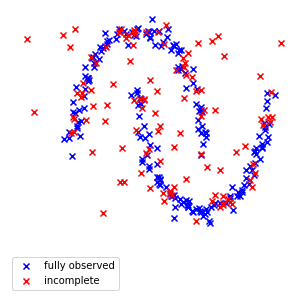

In [70]:
fig = plt.figure(frameon=False, figsize=(4,4))
ax = fig.add_axes([0,0, 1,1])

ax.scatter(X_imputed[~M, 0], X[~M, 1], marker='x', color='b', label='fully observed')
ax.scatter(X_imputed[M, 0], X[M, 1], marker='x', color='r', label='incomplete')

ax.set_xlim(-2, 2.4)
ax.set_ylim(-1.2, 1.2)
ax.axis('off')
ax.legend()


# plt.savefig('slide-figures/MICE-incongenial.pdf')

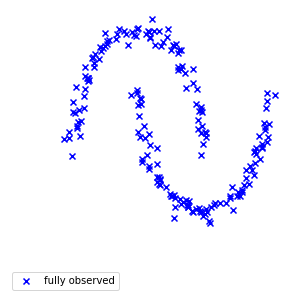

In [68]:
fig = plt.figure(frameon=False, figsize=(4,4))
ax = fig.add_axes([0,0, 1,1])

ax.scatter(X_imputed[~M, 0], X[~M, 1], marker='x', color='b', label='fully observed')
# ax.scatter(X_imputed[M, 0], X[M, 1], marker='x', color='r', label='incomplete')

ax.set_xlim(-2, 2.4)
ax.set_ylim(-1.2, 1.2)
ax.axis('off')
ax.legend(loc='lower left')


plt.savefig('slide-figures/MICE-incongenial-complete.pdf')